In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%run DOCK_OutputParser.ipynb

In [2]:
#############################         USAGE NOTE         ################################
# Run the three enrichment notebooks with the required selection of structures first.   #
# This will generate the required *.npy files used in generating these combined plots   #
#########################################################################################

to_compare=[]

# Xtal
to_compare.append(["bidock_final_cryst/dockout/","Xtal","black"])
#to_compare.append(["bidock_final_cryst/dockout_sel2/","Xtal*","black"]) # Run with a different set of parameters
                                                                         # and make a copy of the dockout file if comparing cases in the same folder
# AF2
to_compare.append(["bidock_final_AF2/dockout/","AF2","red"])

# AF2RAVE
to_compare.append(["optSPIB_MD3/dockout/","AF2RAVE*","#0000FF"])

In [5]:
N_TOT=605 # Total no. of ligands in study
N_GOOD=10

random_er=np.ones(N_TOT)*(N_GOOD/N_TOT)

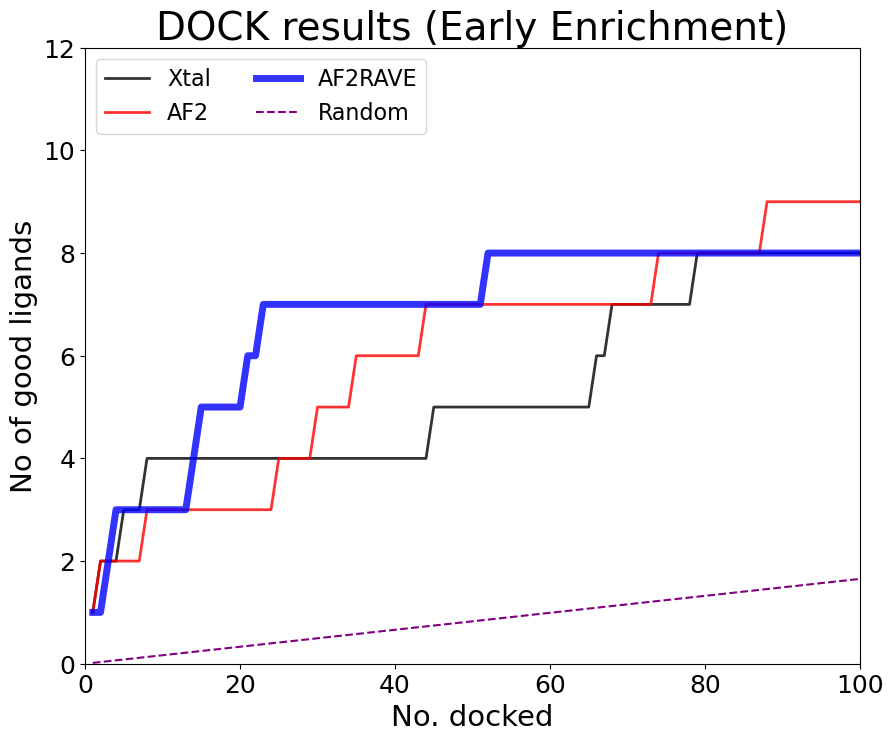

In [10]:
LINEWIDTH=5

plt.figure(figsize=(10,8))
plt.title("DOCK results (Early Enrichment)",fontsize=28)
poses=dict()
for directory,label_name,linecol in to_compare:
    data_file=np.load(directory+"/docking_data.npy")
    no_top=data_file[0]
    data=data_file[1]
    poses[label_name]=(np.unique(np.round(data).astype(int),return_index=True)[1][1:])
    plt.plot(no_top,data,label=label_name.replace("*","").replace("_"," "),c=linecol,linewidth=LINEWIDTH if "*" in label_name else 2,alpha=0.8)

plt.plot(no_top,random_er[:len(no_top)]*no_top[:len(random_er)],label="Random",linestyle="--",c="purple")
plt.legend(fontsize=16,ncols=2,loc="upper left")
plt.xlabel("No. docked",fontsize=21)
plt.ylabel("No of good ligands",fontsize=21)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(0,100)
plt.ylim(0,N_GOOD+2)
plt.show()